# Step 1 Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Step 2 importing the data

In [2]:
# importing csv file using read_csv
data = pd.read_csv('glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
# getting the no of rows and columns in the data
data.shape

(214, 10)

There are in total of 214 records and 10 columns

In [4]:
# getting basic information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


* In the given dataset, all the columns are in numeric in nature
* There are no missing values in the data


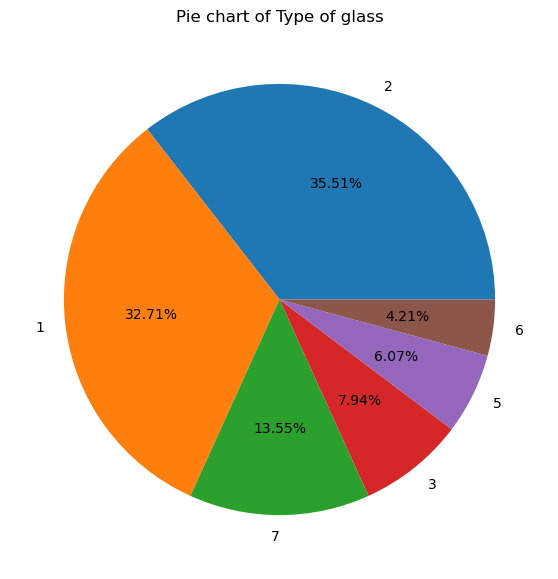

In [5]:
#creating a  of dependent variable
plt.figure(figsize=(7,7))
plt.pie(data['Type'].value_counts(),
        labels = data['Type'].value_counts().to_dict().keys(), #To get the unique values in the column
        autopct='%1.2f%%' )# To get the value_counts of each unique value in the column
plt.title('Pie chart of Type of glass')
plt.show();

In [6]:
data1 = data.copy()

### Q1. Check for outliears and remove if any ?

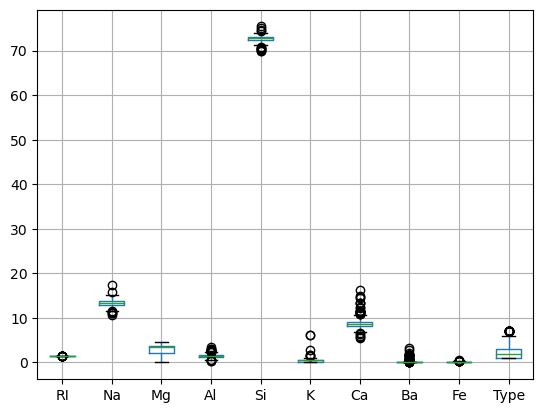

In [7]:
data.boxplot();

* There are outliers in the given data

In [8]:
def outliers(df, column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    out = df[column][(df[column]<lower)|(df[column]>upper)]
    print("The column has {} outliers out of {} records".format(len(out), len(df[column])))
    df = df[~df[column].isin(out)]
   
    new = df[column][(df[column]<lower)|df[column]>upper]
    print("After replacing outliers with mean",len(new))
    return df

In [9]:
for i in data.columns:
    data = outliers(data, i)

The column has 17 outliers out of 214 records
After replacing outliers with mean 0
The column has 1 outliers out of 197 records
After replacing outliers with mean 0
The column has 36 outliers out of 196 records
After replacing outliers with mean 0
The column has 10 outliers out of 160 records
After replacing outliers with mean 0
The column has 5 outliers out of 150 records
After replacing outliers with mean 0
The column has 24 outliers out of 145 records
After replacing outliers with mean 121
The column has 5 outliers out of 121 records
After replacing outliers with mean 0
The column has 6 outliers out of 116 records
After replacing outliers with mean 0
The column has 6 outliers out of 110 records
After replacing outliers with mean 30
The column has 0 outliers out of 104 records
After replacing outliers with mean 0


In [10]:
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...
155,1.51646,13.04,3.40,1.26,73.01,0.52,8.58,0.0,0.00,3
156,1.51655,13.41,3.39,1.28,72.64,0.52,8.65,0.0,0.00,3
158,1.51776,13.53,3.41,1.52,72.04,0.58,8.79,0.0,0.00,3
159,1.51796,13.50,3.36,1.63,71.94,0.57,8.81,0.0,0.09,3


In [11]:
#checking for missing values 
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

* In the given dataset, there are no missing values

### Q2. Check if any features are related to each other ?

In [12]:
corr = data.corr(method ='pearson')
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,0.112558,0.119473,-0.411694,-0.389915,-0.101900,0.527862,NaN,0.030877,-0.283903
Na,0.112558,1.000000,0.252616,-0.014180,-0.642772,-0.359758,-0.307472,NaN,-0.183155,0.131456
Mg,0.119473,0.252616,1.000000,-0.112102,-0.282293,-0.060664,-0.483946,NaN,-0.093993,0.080182
Al,-0.411694,-0.014180,-0.112102,1.000000,-0.124871,0.264455,-0.409398,NaN,-0.039480,0.341190
Si,-0.389915,-0.642772,-0.282293,-0.124871,1.000000,0.072888,-0.154089,NaN,0.071728,-0.320673
K,-0.101900,-0.359758,-0.060664,0.264455,0.072888,1.000000,-0.036310,NaN,0.052779,0.049001
Ca,0.527862,-0.307472,-0.483946,-0.409398,-0.154089,-0.036310,1.000000,NaN,0.180093,-0.134659
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fe,0.030877,-0.183155,-0.093993,-0.039480,0.071728,0.052779,0.180093,NaN,1.000000,-0.026387
Type,-0.283903,0.131456,0.080182,0.341190,-0.320673,0.049001,-0.134659,NaN,-0.026387,1.000000


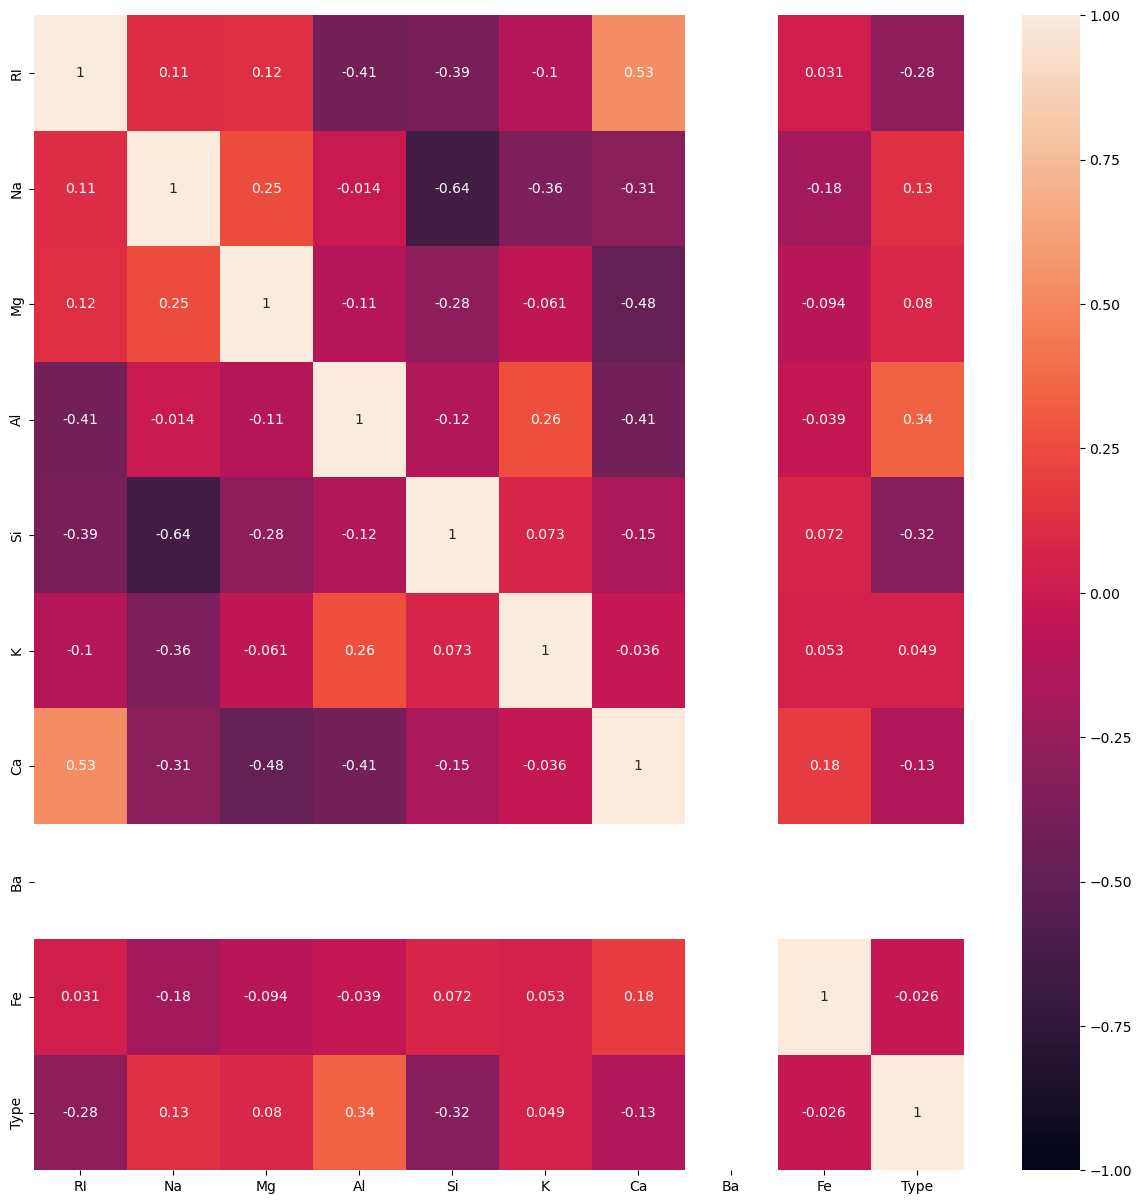

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot = True)
plt.show();

In [14]:
#Splittig the data into X(independent variabled) and y(dependent variable)
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8)

In [16]:
print('X_train shape', X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (83, 9)
X_test shape (21, 9)
y_train shape (83,)
y_test shape (21,)


In [17]:
#Standardizing the data to avoid biasness in the model
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

### Q3. Find the optimal value of 'k' in KNN ?

In [18]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [19]:
y_predict = model_knn.predict(X_test_scale)

In [20]:
accuracy_score(y_test, y_predict)

0.8571428571428571

In [21]:
acc_dict = {}
for i in range(1,40):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scale, y_train)
    y_pred = model.predict(X_test_scale)
    acc = round(accuracy_score(y_test, y_pred),3)
    print("The accuracy of the model {} when k value is {} ".format(acc, i))
    acc_dict[i] = acc
    

The accuracy of the model 0.857 when k value is 1 
The accuracy of the model 0.857 when k value is 2 
The accuracy of the model 0.762 when k value is 3 
The accuracy of the model 0.762 when k value is 4 
The accuracy of the model 0.857 when k value is 5 
The accuracy of the model 0.905 when k value is 6 
The accuracy of the model 0.81 when k value is 7 
The accuracy of the model 0.81 when k value is 8 
The accuracy of the model 0.81 when k value is 9 
The accuracy of the model 0.714 when k value is 10 
The accuracy of the model 0.714 when k value is 11 
The accuracy of the model 0.667 when k value is 12 
The accuracy of the model 0.667 when k value is 13 
The accuracy of the model 0.667 when k value is 14 
The accuracy of the model 0.667 when k value is 15 
The accuracy of the model 0.714 when k value is 16 
The accuracy of the model 0.714 when k value is 17 
The accuracy of the model 0.619 when k value is 18 
The accuracy of the model 0.714 when k value is 19 
The accuracy of the mode

In [22]:
for j in acc_dict:
    if acc_dict[j] == max(acc_dict.values()):
        print(j,":", acc_dict[j])

6 : 0.905


### Q4. Calculate the mean performance of the model ?

In [23]:
print(f1_score(y_test,y_predict , average='macro'))

0.899749373433584


### Q5. Perform Feature selection and build a KNN Classifier by considering optimal value of k?

In [24]:
X = X.drop('Ba', axis = 1)

In [25]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2)

In [26]:
print(X_train1.shape)
print(y_train1.shape)
print(X_test1.shape)
print(y_test1.shape)

(83, 8)
(83,)
(21, 8)
(21,)


In [27]:
#Standardizing the data to avoid biasness in the model
scaler = StandardScaler()
scaler.fit(X_train1)
X_train_scale1 = scaler.transform(X_train1)
X_test_scale1 = scaler.transform(X_test1)

In [28]:
model_knn1 = KNeighborsClassifier(n_neighbors=8)
model_knn1.fit(X_train_scale1, y_train1)

KNeighborsClassifier(n_neighbors=8)

In [29]:
y_predict1 = model_knn1.predict(X_test_scale1)

In [30]:
accuracy_score(y_test1, y_predict1)

0.6190476190476191

In [31]:
acc_dict = {}
for i in range(1,40):
    model = KNeighborsClassifier(i)
    model.fit(X_train_scale1, y_train1)
    y_pred1 = model.predict(X_test_scale1)
    acc = round(accuracy_score(y_test1, y_pred1),3)
    print("The accuracy of the model {} when k value is {} ".format(acc, i))
    acc_dict[i] = acc
    

The accuracy of the model 0.762 when k value is 1 
The accuracy of the model 0.667 when k value is 2 
The accuracy of the model 0.667 when k value is 3 
The accuracy of the model 0.667 when k value is 4 
The accuracy of the model 0.667 when k value is 5 
The accuracy of the model 0.667 when k value is 6 
The accuracy of the model 0.667 when k value is 7 
The accuracy of the model 0.619 when k value is 8 
The accuracy of the model 0.667 when k value is 9 
The accuracy of the model 0.619 when k value is 10 
The accuracy of the model 0.619 when k value is 11 
The accuracy of the model 0.571 when k value is 12 
The accuracy of the model 0.667 when k value is 13 
The accuracy of the model 0.667 when k value is 14 
The accuracy of the model 0.571 when k value is 15 
The accuracy of the model 0.619 when k value is 16 
The accuracy of the model 0.571 when k value is 17 
The accuracy of the model 0.619 when k value is 18 
The accuracy of the model 0.571 when k value is 19 
The accuracy of the m

In [32]:
for j in acc_dict:
    if acc_dict[j] == max(acc_dict.values()):
        print(j,":", acc_dict[j])

1 : 0.762


# SVC

In [33]:
svc = SVC()
svc.fit(X_train_scale1, y_train1)

SVC()

In [34]:
y_predict_svc = svc.predict(X_test_scale1)

In [35]:
print('Accuracy score of svc model = ', accuracy_score(y_test1,y_predict_svc))

Accuracy score of svc model =  0.7142857142857143


# Decision Tree

In [36]:
dt = DecisionTreeClassifier()
dt.fit(X_train_scale1,y_train1)

DecisionTreeClassifier()

In [37]:
y_predict_dt = dt.predict(X_test_scale1)

In [38]:
print('Accuracy score of dt model = ', accuracy_score(y_test1,y_predict_dt))

Accuracy score of dt model =  0.8095238095238095
